In [2]:
import tensorflow as tf
import os
import numpy as np
np.set_printoptions(precision=3)
# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')


2025-01-31 03:39:46.986826: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 03:39:47.184145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 03:39:47.366979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738262387.571598    6903 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738262387.645523    6903 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 03:39:47.976085: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### 텐서플로 텐서만들기 및 조작

In [3]:
a = np.array([1,2,3], dtype=np.int32)
b = [4,5,6]


# numpy 배열을 텐서로 변환
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


2025-01-31 03:39:53.225211: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
# 0, 1 , 지정값 으로 채워진 텐서 생성하기
t_ones = tf.ones((2,3))

t_zeros = tf.zeros((2,3))

t_fill = tf.fill((2,3), 5)

print(t_ones, t_zeros, t_fill)


# 텐서를 numpy 배열로 변환하기
print(f'{t_ones.numpy()} \n\n {t_zeros.numpy()} \n\n {t_fill.numpy()}')

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32) tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32) tf.Tensor(
[[5 5 5]
 [5 5 5]], shape=(2, 3), dtype=int32)
[[1. 1. 1.]
 [1. 1. 1.]] 

 [[0. 0. 0.]
 [0. 0. 0.]] 

 [[5 5 5]
 [5 5 5]]


### 텐서의 데이터 타입 및 크기 조작법

In [5]:
# cast : 텐서의 데이터 타입을 지정 타입으로 변환하기

t_a_new = tf.cast(t_a, tf.float32)


# 텐서의 크기 변환하기 ; 원소 개수는 유지하면서, 텐서의 차원을 변경한다.
t = tf.random.uniform((12,))
t_reshape = tf.reshape(t, shape = (4,3))
print(t_reshape)

# 불필요한 차원 제거하기
t = tf.zeros((1,2,1,4,1))
t_sqz = tf.squeeze(t, axis=(2,4))
print(t)
print(t_sqz)

tf.Tensor(
[[0.604 0.892 0.594]
 [0.884 0.164 0.044]
 [0.936 0.837 0.426]
 [0.636 0.369 0.404]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[[[[0.]
    [0.]
    [0.]
    [0.]]]


  [[[0.]
    [0.]
    [0.]
    [0.]]]]], shape=(1, 2, 1, 4, 1), dtype=float32)
tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(1, 2, 4), dtype=float32)


### 텐서 수학 연산 ; 원소별 연산, 행렬 연산, Norm연산

In [6]:
# 랜덤 텐서 생성후, 곱연산

t1 = tf.random.uniform((2,5) , minval=-1.0, maxval=1.0)
t2 = tf.random.normal((2,5) , mean=0.0, stddev=1.0)

# 원소별 곱연산
t3 = t1 * t2

# 원소별 곱연산
t4 = tf.multiply(t1, t2)

print(t3)
print(t4)


# 행렬곱 연산
t5 = tf.linalg.matmul(t1, tf.transpose(t2))
print(t5)



tf.Tensor(
[[-0.131  0.118  0.463 -1.025 -0.034]
 [-0.02  -0.085 -0.833  0.998  0.495]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[-0.131  0.118  0.463 -1.025 -0.034]
 [-0.02  -0.085 -0.833  0.998  0.495]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[-0.609 -0.12 ]
 [-0.276  0.554]], shape=(2, 2), dtype=float32)


In [7]:
# 텐서의 특정 축(행,열)을 따라 합, 평균, 분산, 등등 구하기

t_mean = tf.math.reduce_mean(t1, axis=1) # 행을 따라 평균
t_sum = tf.math.reduce_sum(t1, axis=0) # 열을 따라 합
t_min = tf.math.reduce_min(t1, axis=1) # 행을 따라 최소값
t_max = tf.math.reduce_max(t1, axis=0) # 열을 따라 최대값
t_prod = tf.math.reduce_prod(t1, axis=1) # 행을 따라 곱
t_std = tf.math.reduce_std(t1, axis=0) # 열을 따라 표준편차
t_var = tf.math.reduce_variance(t1, axis=1) # 행을 따라 분산

print(t_mean.numpy())
print(t_sum.numpy())
print(t_min.numpy())
print(t_max.numpy())
print(t_prod.numpy())
print(t_std.numpy())
print(t_var.numpy())


[-0.151 -0.2  ]
[-0.759 -1.094 -0.957  1.573 -0.522]
[-0.673 -0.679]
[-0.085 -0.521 -0.451  0.79   0.157]
[-0.021  0.012]
[0.294 0.026 0.028 0.004 0.418]
[0.301 0.284]


In [8]:
# L^p Norm 연산

norm_t1 = tf.norm(t1, ord=2, axis=1).numpy() # L^2 norm, 행을 따라, numpy()로 변환
print(norm_t1)

[1.273 1.273]


### 텐서 쪼개기, 합치기 ; split , stack, concat

In [9]:
# 6개 원소 1차원 텐서를 2개로 쪼개기 : 분할 개수 입력

t = tf.random.uniform((6,))
t_split = tf.split(t, num_or_size_splits=2) # 2개로 쪼개진 텐서들의 리스트

[print(item.numpy()) for item in t_split] # 리스트 내포로 각 텐서를 numpy 배열로 변환


# 쪼개기 : 분할 크기 입력
t_split = tf.split(t, num_or_size_splits=[4,2]) # 4개, 2개로 쪼개진 텐서들의 리스트
[print(item.numpy()) for item in t_split] # 리스트 내포로 각 텐서를 numpy 배열로 변환



[0.927 0.02  0.095]
[0.289 0.699 0.401]
[0.927 0.02  0.095 0.289]
[0.699 0.401]


[None, None]

In [10]:
# 텐서 합치기
t1 = tf.ones((2,3))
t2 = tf.zeros((2,2))

t3 = tf.concat([t1,t2], axis=1) # 열을 따라 합치기
print(t3.numpy())

# 텐서 쌓기
t1 = tf.ones((2,3))
t2 = tf.zeros((2,3))

t3 = tf.stack([t1,t2], axis=0) # 쌓기
print(t3.numpy())


[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]]
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]


### 텐서플로를 활용한 데이터 전처리

실제 인공신경망에 데이터를 입력하기 전에,  먼저 데이터를 잘 단디해서 좋은 상태로 만들어야 한다.

즉, 

(1) 평균을 0에 맞추거나, 스케일 조정<br>
(2) Overfitting을 막기위한 조정<br>
(3) Training Augmentation : 노이즈 삽입<br>
(4) 미니배치SGD 등을 위한, 배치나누기 작업

![minibatch](../images/minibatch.PNG)


과 같은 과정을 먼저 거쳐야 한다.  이를 손쉽게 하기 위한 텐서플로의 기능들을 살펴보자

In [11]:
# 데이터셋 만들기

# 1. 텐서플로우 데이터셋 API로 데이터셋 만들기
list_a = [1,2,3,4,5]
dataset = tf.data.Dataset.from_tensor_slices(list_a)
print(dataset)

# 2. 데이터셋의 요소를 순회(iteration)하기
for item in dataset:
    print(item)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


2025-01-31 03:39:53.676255: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
# 배치 만들기

dataset_batch = dataset.batch(3) # 배치 크기 3 : 3개씩 묶어서 배치 만들기

for i, elem in enumerate(dataset_batch, 1): # 인덱스 1부터 시작
    print(f'batch {i}:', elem.numpy())

batch 1: [1 2 3]
batch 2: [4 5]


2025-01-31 03:39:53.737203: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


##### 특성텐서 ( 훈련 데이터의 개수와 특성 종류를 담은 텐서) 그리고, 레이블 텐서

이 2개의 텐서를 하나의 데이터셋으로 결합시켜서 튜플 형태로 만들자.

그러면, 이 2개를 따로 처리할때, 2개의 개수가 1대1대응이 되지 않아버리는 문제를 해결할 수 있다.
( 기본적으로, tuple은 수정할수 없는 객체 )

In [ ]:
# 특성 텐서와 레이블 텐서 하나의 데이터셋으로 연결하기

# 3개 특성 가지는 4개 샘플 & 4개 레이블
t_x = tf.random.uniform([4,3], dtype=tf.float32)
t_y = tf.range(4)

# 위 텐서를 데이터 셋으로 변환
dataset_x = tf.data.Dataset.from_tensor_slices(t_x)
dataset_y = tf.data.Dataset.from_tensor_slices(t_y)

# 하나의 데이터 셋으로 연결
dataset = tf.data.Dataset.zip((dataset_x, dataset_y)) # dataset의 원소는 (특성, 레이블) 튜플

# or 

dataset = tf.data.Dataset.from_tensor_slices((t_x, t_y)) # 위와 동일한 결과

# 데이터 순회
for example in dataset:
    x, y = example # 튜플 언패킹
    print(x.numpy(), y.numpy()) # numpy()로 변환하여 출력



[0.038 0.643 0.828] 0
[0.439 0.307 0.068] 1
[0.891 0.928 0.1  ] 2
[0.74  0.464 0.221] 3


In [14]:
# 데이터셋의 요소를 변환하기
# map() 메서드로 데이터셋의 각 요소 변환하기
# map 의 역할 : 함수를 받아서, 데이터셋의 각 요소에 해당 함수 적용 
# a = lambda x,y: (x , x+y) => a는 (x,y)를 받아서 (x, x+y)로 변환하는 함수
# a(1,2) => (1,3)

# x는 0~1 사이의 랜덤 값인데, 이를 -1~1 사이로 변환
dataset_TF = dataset.map(lambda x, y: (x*2-1.0, y)) # 각 요소에 대해  (x,y) -> (x*2-1.0, y) 변환
for x, y in dataset_TF:
    print(x.numpy(), y.numpy()) # 변환된 데이터셋 출력

[-0.924  0.286  0.656] 0
[-0.122 -0.386 -0.863] 1
[ 0.782  0.856 -0.8  ] 2
[ 0.48  -0.072 -0.559] 3


2025-01-31 03:39:54.004779: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


##### 미니배치 SGD를 위한 shuffle, batch, repeat 메소드

미니배치 SGD를 위해서,  주어진 입력 데이터를 여러개의 배치로 만들고,  이 배치를 '무작위로' 뽑아야 할 필요가 있다.

이 작업을 간단하게 해주는 메소드를 살펴보자.

In [15]:
tf.random.set_seed(1)
for item in dataset:
    print(f'x = {item[0].numpy()}, y = {item[1].numpy()}')

print('######################################')

# 데이터 셋의 요소, 즉, (특성, 레이블) 튜플을 섞는다.
dataset_shuffled = dataset.shuffle(buffer_size = len(t_x)) # 데이터셋 섞기 , len(t_x) == 4
for item in dataset_shuffled:
    print(f'x = {item[0].numpy()}, y = {item[1].numpy()}')

x = [0.038 0.643 0.828], y = 0
x = [0.439 0.307 0.068], y = 1
x = [0.891 0.928 0.1  ], y = 2
x = [0.74  0.464 0.221], y = 3
######################################
x = [0.891 0.928 0.1  ], y = 2
x = [0.439 0.307 0.068], y = 1
x = [0.038 0.643 0.828], y = 0
x = [0.74  0.464 0.221], y = 3


In [22]:
# 데이터셋의 요소를 배치로 만들기

dataset_batched = dataset.batch(batch_size=3 , drop_remainder=False) # drop_remainder=True : 마지막 배치 크기가 3보다 작으면 버림

for x , y in dataset_batched:
    print(x.numpy(), y.numpy())

# 데이터셋을 이터레이터로 바꾸고, 다음 요소(첫번째 배치) 가져오기
# 이터러블,이터레이터,next 는 아래 설명 참조
batch_x, batch_y = next(iter(dataset_batched))

# 첫번째 배치 출력
print(batch_x.numpy(), batch_y.numpy())


[[0.038 0.643 0.828]
 [0.439 0.307 0.068]
 [0.891 0.928 0.1  ]] [0 1 2]
[[0.74  0.464 0.221]] [3]
[[0.038 0.643 0.828]
 [0.439 0.307 0.068]
 [0.891 0.928 0.1  ]] [0 1 2]


##### Iterable vs. Iterator

__Iterable__: An object that can return an iterator. Examples include lists, tuples, and TensorFlow datasets. You can loop over an iterable using a for loop.
<br><br>

__Iterator__: An object that represents a stream of data. It produces the next value when you call next() on it. An iterator keeps track of its current position during iteration.

##### Why Use iter()?

__Explicit Control__: By calling iter() on an iterable, you create an iterator that you can control explicitly. This allows you to use next() to manually retrieve elements one at a time.

=> that's why we use 'iter()' to make 'dataset_batched' iterator. when iterating this object, it maintains its state so that it is easy to resume iteration next time.
<br><br>

__Single Batch Retrieval__: If you want to retrieve a single batch from a dataset, using iter() and next() is a straightforward way to do this without looping through the entire dataset.
<br><br>

__State Management__: An iterator maintains its state, meaning it knows where it is in the sequence. This is useful when you need to pause and resume iteration or when you need to fetch elements conditionally.


##### next()
this function retrieves the next item of iterator. and the iterator maintains the index that this function takes item from. 

In [25]:
# repeat() 을 사용해서 배치 반복하기
# 데이터셋 -> 3개씩 묶어서 배치 만들기 -> 2번 반복함  =  3개씩 묶인 배치 꾸러미가 2개 생성
dataset_batched_repeated = dataset.batch(3).repeat(count=2)

for i, (batch_x, batch_y) in enumerate(dataset_batched_repeated):
    print(i, batch_x.numpy(), batch_y.numpy())

# 실행결과, 0,1 인덱스는 배치, 2,3 인덱스는 반복된 배치

0 [[0.038 0.643 0.828]
 [0.439 0.307 0.068]
 [0.891 0.928 0.1  ]] [0 1 2]
1 [[0.74  0.464 0.221]] [3]
2 [[0.038 0.643 0.828]
 [0.439 0.307 0.068]
 [0.891 0.928 0.1  ]] [0 1 2]
3 [[0.74  0.464 0.221]] [3]


if your original dataset had 6 elements, after batching and repeating, you would end up with 4 batches of 3 elements each (since 6 elements batched into 3 gives 2 batches, and repeating this twice gives 4 batches).

In [27]:
# repeat() 을 기존 데이터셋에 사용하면, 데이터셋이 복제되어 2배가 된다.

dataset_repeated = dataset.repeat(count=2)

for i, item in enumerate(dataset_repeated):
    print(i, item[0].numpy(), item[1].numpy())

# 실행결과 기존 데이터셋이 2번 반복됨

0 [0.038 0.643 0.828] 0
1 [0.439 0.307 0.068] 1
2 [0.891 0.928 0.1  ] 2
3 [0.74  0.464 0.221] 3
4 [0.038 0.643 0.828] 0
5 [0.439 0.307 0.068] 1
6 [0.891 0.928 0.1  ] 2
7 [0.74  0.464 0.221] 3


### 로컬 디스크 파일에서 데이터 추출후 데이터셋 만들기

로컬로 저장된 이미지 파일들을 데이터셋으로 변환하는 데이터 전처리 과정을 살펴보자

현재 vscode 로컬 파일 경로, '../train_images' 로부터 이미지를 추출하자.

In [31]:
import pathlib
import matplotlib.pyplot as plt

# 이미지 파일 경로 리스트
# pathlib.Path.glob() 메소드는 지정된 패턴(여기서는 '*.jpg')에 일치하는 모든 파일의 경로를 반환
# str(path)는 path 객체 = 끝이 jpg 인 파일의 경로를 문자열로 변환
# sorted()는 파일 경로 리스트를 정렬
imgdir_path = pathlib.Path('../cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

['../cat_dog_images/cat-01.jpg', '../cat_dog_images/cat-02.jpg', '../cat_dog_images/cat-03.jpg', '../cat_dog_images/dog-01.jpg', '../cat_dog_images/dog-02.jpg', '../cat_dog_images/dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


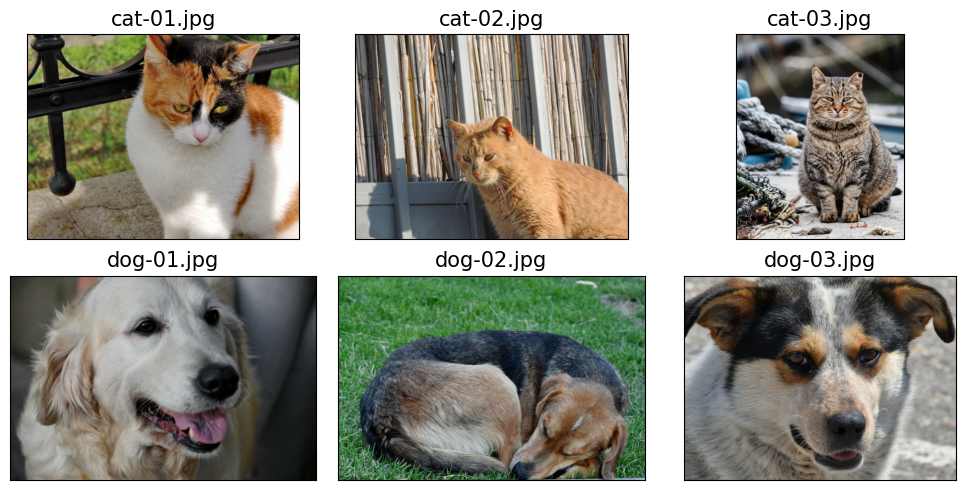

In [35]:
fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list, 1): # 시작번호 1

    # 이미지,텍스트 등 여러 파일들을 처리하는 첫번째 단계로 사용한다.
    # 파일을 읽어서 바이트 문자열 타입 텐서로 반환한다.
    img_raw = tf.io.read_file(file) # 파일 읽기  : file = '../cat_dog_images/cat.1.jpg'
    
    # 이미지 디코딩
    # 바이트 문자열 텐서를 받고, 이미지 디코딩후 이미지 타입에 따라서 적절한 텐서를 반환한다.
    # PNG, JPEG, BMP 등은 3차원 텐서 [높이, 너비, RGB채널]로 반환한다.
    # GIF 파일은 4차원 텐서 [프레임, 높이, 너비, RGB채널]로 반환한다.
    img = tf.image.decode_image(img_raw)
    print(f'Image shape: {img.shape}')  # 이미지 크기를 담고 있는 attribute shape 출력
    ax = fig.add_subplot(2,3,i) # 2x3 subplot 생성
    ax.set_xticks([]) # x축 눈금 없애기
    ax.set_yticks([]) # y축 눈금 없애기
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15) # 파일명을 타이틀로 설정
plt.tight_layout() # subplot 간격 조정
plt.show()

##### 이미지 파일 전처리 ( 이미지 디코딩, .map()으로 이미지 크기 변환)

In [40]:
# 개, 고양이 레이블 리스트 만들기
# 파일명에 'dog'가 포함되어 있으면 1, 아니면 0
label_list = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(label_list)

# list comprehension 요약
'''
filtering : [x for x in iterable if condition]

mapping : [f(x) for x in iterable]

if-else filtering : [x if condition else y for x in iterable]

list of tuple : [(x,y) for x in iterable1 for y in iterable2]
=> [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
'''

# 이미지랑 정답 레이블을 하나의 데이터셋으로 만들기

dataset_img_lbl = tf.data.Dataset.from_tensor_slices((file_list, label_list))
for i, item in enumerate(dataset_img_lbl, 1):
    print(i, item[0].numpy(), item[1].numpy())

[0, 0, 0, 1, 1, 1]
1 b'../cat_dog_images/cat-01.jpg' 0
2 b'../cat_dog_images/cat-02.jpg' 0
3 b'../cat_dog_images/cat-03.jpg' 0
4 b'../cat_dog_images/dog-01.jpg' 1
5 b'../cat_dog_images/dog-02.jpg' 1
6 b'../cat_dog_images/dog-03.jpg' 1


2025-01-31 05:13:49.009744: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


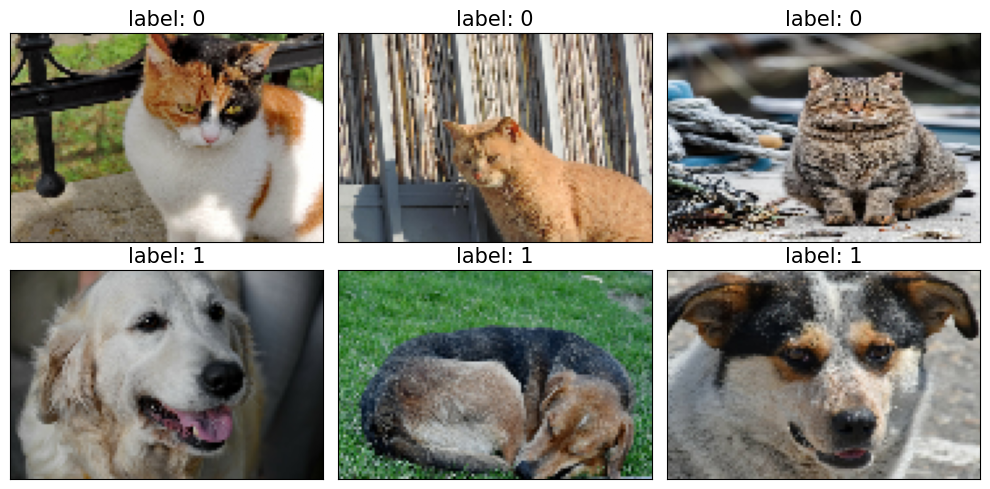

In [44]:
# map으로 이미지 파일 변환 (전부 동일 사이즈로 변환)

# map 메서드의 헬퍼 함수 정의
# map 메서드는, 주어진 데이터셋 ( 여기서는 dataset_img_lbl )의 각 요소에 대해, load_and_preprocess() 함수를 적용한다.
# dataset_img_lbl의 각 요소는 (path, label) 튜플이다. 
# 따라서, load_and_preprocess() 함수는 (path, label) 튜플을 받아서, (이미지, 레이블) 튜플로 변환하는 함수이어야 한다.
def load_and_preprocess(path, label):
    # 파일 읽기 : 바이너리 문자열 타입 텐서로 반환
    img_raw = tf.io.read_file(path)
    # 이미지 디코딩 : [ 높이, 너비, color 채널 ] 텐서로 반환
    img = tf.image.decode_jpeg(img_raw , channels=3)  # 컬러채널 1: 흑백, 3: 컬러
    # 이미지 크기 변환 : 3D or 4D 텐서를 사이즈 [img_height, img_width]에 맞는 3D 텐서 [img_height, img_width, 3]로 변환
    img = tf.image.resize(img, [img_height, img_width])
    # 이미지 정규화 : 픽셀값들을 0~1 사이 값으로 변환 
    img /= 255.0
    return img, label

# 이미지 크기
img_height, img_width = 80, 120

# map 메서드로 이미지 변환 : 이미지 사이즈 변환 및 픽셀값 정규화
dataset_img_lbl_transformed = dataset_img_lbl.map(load_and_preprocess)

# 이미지 출력
fig = plt.figure(figsize=(10,5))
for i, (img, label) in enumerate(dataset_img_lbl_transformed, 1):
    ax = fig.add_subplot(2,3,i)
    ax.set_xticks([]) # x축 눈금 없애기
    ax.set_yticks([]) # y축 눈금 없애기
    ax.imshow(img)
    ax.set_title(f'label: {label}', size=15)
plt.tight_layout()
plt.show()
